2021-07-28 16:51:29 Configured OSMnx 1.1.1
2021-07-28 16:51:29 HTTP response caching is on
2021-07-28 16:51:34 Converting node, edge, and graph-level attribute data types
2021-07-28 16:51:35 Loaded graph with 41788 nodes and 82946 edges from "/home/hugo/PycharmProjects/routeplanner/proto/madrid.gml"
2021-07-28 16:51:36 Created edges GeoDataFrame from graph


[16:51:37] ../src/executor/graph_executor.cc:1995: Subgraph backend MKLDNN is activated.


2021-07-28 16:51:37 Created nodes GeoDataFrame from graph
2021-07-28 16:51:38 Created nodes GeoDataFrame from graph
[2005580996, 1606794704, 3220616799, 20960707, 2005580994, 4572150456, 448915849]
False
2021-07-28 16:51:38 Begin plotting the graph...
2021-07-28 16:51:43 Created edges GeoDataFrame from graph
2021-07-28 16:51:47 Created nodes GeoDataFrame from graph
2021-07-28 16:51:51 Finished plotting the graph


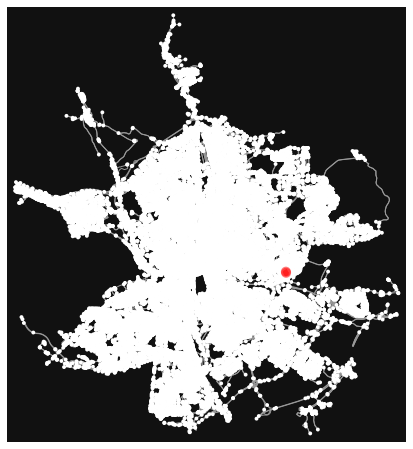

In [1]:
import sys
sys.path.append('/home/hugo/PycharmProjects/routeplanner/src')

import modelbuilder as mb
import TrainingData as td
import MapReader as mr
import trainer as tr
import Model as mod
import RoutePlanner as rp
import osmnx as ox

graph = mr.ReadMap("/home/hugo/PycharmProjects/routeplanner/proto/madrid.gml")

model = mod.Model(mb.build_model())

# https://mxnet.apache.org/versions/1.7.0/api/python/docs/api/module/index.html
# https://mxnet-tqchen.readthedocs.io/en/latest/packages/python/module.html

# before loading parameters we have to bind the model
# data size is batch_size, feature width
# lbel size is batch size
model.get_model().bind(data_shapes=[('data', (20, 25))], label_shapes=[('softmax_label', (20,))])

model.get_model().load_params("/home/hugo/PycharmProjects/routeplanner/test/model_params")

origin_point = (-3.6121729, 40.4224813)
destination_point = (-3.7090030, 40.4538682)
node_src = ox.distance.nearest_nodes(graph, origin_point[0], origin_point[1])
node_dst = ox.distance.nearest_nodes(graph, destination_point[0], destination_point[1])

route, valid = rp.get_route(model, graph, node_src, node_dst)

print(route)
print(valid)

fig, ax = ox.plot_graph_route(graph, route)
